<a href="https://colab.research.google.com/github/JGP-Code/Challenge_Alura_Store_Colab/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



**Ingreso total por cada tienda**

En este primer análisis, debes calcular el ingreso total de cada tienda. Sumando los valores de la columna Precio de cada conjunto de datos de la tienda para estimar los ingresos.

In [ ]:
#Impresión de todos los resultados
ingreso_total_1 = tienda['Precio'].sum()
ingreso_total_2 = tienda2['Precio'].sum()
ingreso_total_3 = tienda3['Precio'].sum()
ingreso_total_4 = tienda4['Precio'].sum()

print(f'El ingreso total de la tienda 1 es de ${ingreso_total_1:,.2f}')
print(f'El ingreso total de la tienda 2 es de ${ingreso_total_2:,.2f}')
print(f'El ingreso total de la tienda 3 es de ${ingreso_total_3:,.2f}')
print(f'El ingreso total de la tienda 4 es de ${ingreso_total_4:,.2f}')

ingresos = [ingreso_total_1, ingreso_total_2, ingreso_total_3, ingreso_total_4]
nombres = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

mayor_ingreso = ingresos.index(max(ingresos))
menor_ingreso = ingresos.index(min(ingresos))


print(f'La tienda con mayor ingreso es: {nombres[mayor_ingreso]} con: {ingresos[mayor_ingreso]:,.2f} \
 y la tienda con menor ingreso es: {nombres[menor_ingreso]} con: {ingresos[menor_ingreso]:,.2f}')

El ingreso total de la tienda 1 es de $1,150,880,400.00
El ingreso total de la tienda 2 es de $1,116,343,500.00
El ingreso total de la tienda 3 es de $1,098,019,600.00
El ingreso total de la tienda 4 es de $1,038,375,700.00
La tienda con mayor ingreso es: Tienda 1 con: 1,150,880,400.00  y la tienda con menor ingreso es: Tienda 4 con: 1,038,375,700.00


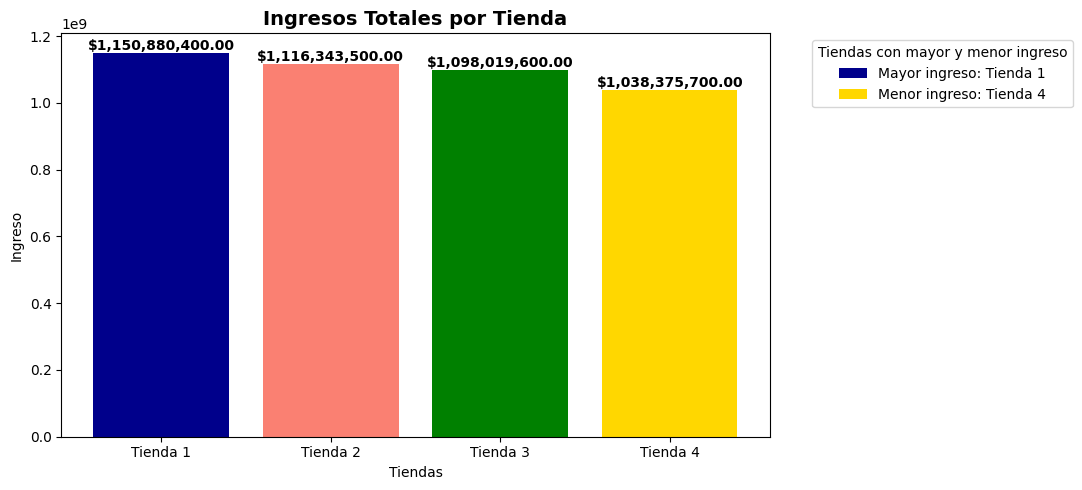

In [ ]:
#Creación del gráfico para el ingreso total de las tiendas
import matplotlib.pyplot as plt

# Asignar color por tienda

colores = ['darkblue', 'salmon', 'green', 'gold']

# Estilo del gráfico
fig, ax = plt.subplots(figsize=(11, 5))

# Crear barras con etiquetas solo para mayor y menor ingreso
barras = []
for i, (nombre, ingreso, color) in enumerate(zip(nombres, ingresos, colores)):
    if i == mayor_ingreso:
        barra = ax.bar(nombre, ingreso, color=color, label=f"Mayor ingreso: {nombre}")
    elif i == menor_ingreso:
        barra = ax.bar(nombre, ingreso, color=color, label=f"Menor ingreso: {nombre}")
    else:
        barra = ax.bar(nombre, ingreso, color=color)
    barras.append(barra)


# Crear barras
barras = ax.bar(nombres, ingresos, color=colores)

# Etiquetas sobre cada barra
for barra, ingreso in zip(barras, ingresos):
    ax.text(barra.get_x() + barra.get_width() / 2,
            barra.get_height(),
            f"${ingreso:,.2f}",
            ha='center', va='bottom', fontsize=10, fontweight='bold')

# Colocar la leyenda fuera del gráfico a la derecha
plt.legend(title="Tiendas con mayor y menor ingreso", bbox_to_anchor=(1.05, 1), loc='upper left')

# Título y etiquetas
ax.set_title('Ingresos Totales por Tienda', fontsize=14, fontweight='bold')
ax.set_ylabel('Ingreso')
ax.set_xlabel('Tiendas')

plt.tight_layout()
plt.show()

# 2. Ventas por categoría

Calcular la cantidad de productos vendidos por categoría en cada tienda. La idea es agrupar los datos por categoría y contar el número de ventas de cada tipo, mostrando las categorías más populares de cada tienda.

In [ ]:
mas_vend_t1 = tienda.groupby('Categoría del Producto')[['Producto']].count().sort_values(by = 'Producto',ascending = False).rename(columns={'Producto': 'Cantidad Vendida'}).reset_index()
mas_vend_t1

,Categoría del Producto,Cantidad Vendida
0,Muebles,465
1,Electrónicos,448
2,Juguetes,324
3,Electrodomésticos,312
4,Deportes y diversión,284
5,Instrumentos musicales,182
6,Libros,173
7,Artículos para el hogar,171


In [ ]:
tienda['Categoría del Producto'].unique()

array(['Electrónicos', 'Muebles', 'Juguetes', 'Electrodomésticos',
       'Artículos para el hogar', 'Deportes y diversión', 'Libros',
       'Instrumentos musicales'], dtype=object)

In [ ]:
mas_vend_t2 = tienda2.groupby('Categoría del Producto')[['Producto']].count().sort_values(by = 'Producto',ascending = False).rename(columns={'Producto': 'Cantidad Vendida'}).reset_index()
mas_vend_t2

,Categoría del Producto,Cantidad Vendida
0,Muebles,442
1,Electrónicos,422
2,Juguetes,313
3,Electrodomésticos,305
4,Deportes y diversión,275
5,Instrumentos musicales,224
6,Libros,197
7,Artículos para el hogar,181


In [ ]:
tienda2['Categoría del Producto'].unique()

array(['Muebles', 'Instrumentos musicales', 'Deportes y diversión',
       'Electrónicos', 'Artículos para el hogar', 'Juguetes',
       'Electrodomésticos', 'Libros'], dtype=object)

In [ ]:
mas_vend_t3 = tienda3.groupby('Categoría del Producto')[['Producto']].count().sort_values(by = 'Producto',ascending = False).rename(columns={'Producto': 'Cantidad Vendida'}).reset_index()
mas_vend_t3

,Categoría del Producto,Cantidad Vendida
0,Muebles,499
1,Electrónicos,451
2,Juguetes,315
3,Electrodomésticos,278
4,Deportes y diversión,277
5,Libros,185
6,Artículos para el hogar,177
7,Instrumentos musicales,177


In [ ]:
tienda3['Categoría del Producto'].unique()

array(['Electrodomésticos', 'Muebles', 'Instrumentos musicales',
       'Deportes y diversión', 'Electrónicos', 'Juguetes',
       'Artículos para el hogar', 'Libros'], dtype=object)

In [ ]:
mas_vend_t4 = tienda4.groupby('Categoría del Producto')[['Producto']].count().sort_values(by = 'Producto',ascending = False).rename(columns={'Producto': 'Cantidad Vendida'}).reset_index()
mas_vend_t4

,Categoría del Producto,Cantidad Vendida
0,Muebles,480
1,Electrónicos,451
2,Juguetes,338
3,Deportes y diversión,277
4,Electrodomésticos,254
5,Artículos para el hogar,201
6,Libros,187
7,Instrumentos musicales,170


In [ ]:
tienda4['Categoría del Producto'].unique()

array(['Electrodomésticos', 'Muebles', 'Deportes y diversión', 'Libros',
       'Electrónicos', 'Instrumentos musicales', 'Juguetes',
       'Artículos para el hogar'], dtype=object)

In [ ]:
# Asegúrate de que cada DataFrame tenga columnas bien definidas
mas_catvend_t1 = mas_vend_t1.reset_index()
mas_catvend_t2 = mas_vend_t2.reset_index()
mas_catvend_t3 = mas_vend_t3.reset_index()
mas_catvend_t4 = mas_vend_t4.reset_index()

mas_catvend_t1['Tienda'] = 'Tienda 1'
mas_catvend_t2['Tienda'] = 'Tienda 2'
mas_catvend_t3['Tienda'] = 'Tienda 3'
mas_catvend_t4['Tienda'] = 'Tienda 4'

cat_mas_ventas = pd.concat([
    mas_catvend_t1.head(3),
    mas_catvend_t2.head(3),
    mas_catvend_t3.head(3),
    mas_catvend_t4.head(3)
])
cat_mas_ventas


,index,Categoría del Producto,Cantidad Vendida,Tienda
0,0,Muebles,465,Tienda 1
1,1,Electrónicos,448,Tienda 1
2,2,Juguetes,324,Tienda 1
0,0,Muebles,442,Tienda 2
1,1,Electrónicos,422,Tienda 2
2,2,Juguetes,313,Tienda 2
0,0,Muebles,499,Tienda 3
1,1,Electrónicos,451,Tienda 3
2,2,Juguetes,315,Tienda 3
0,0,Muebles,480,Tienda 4


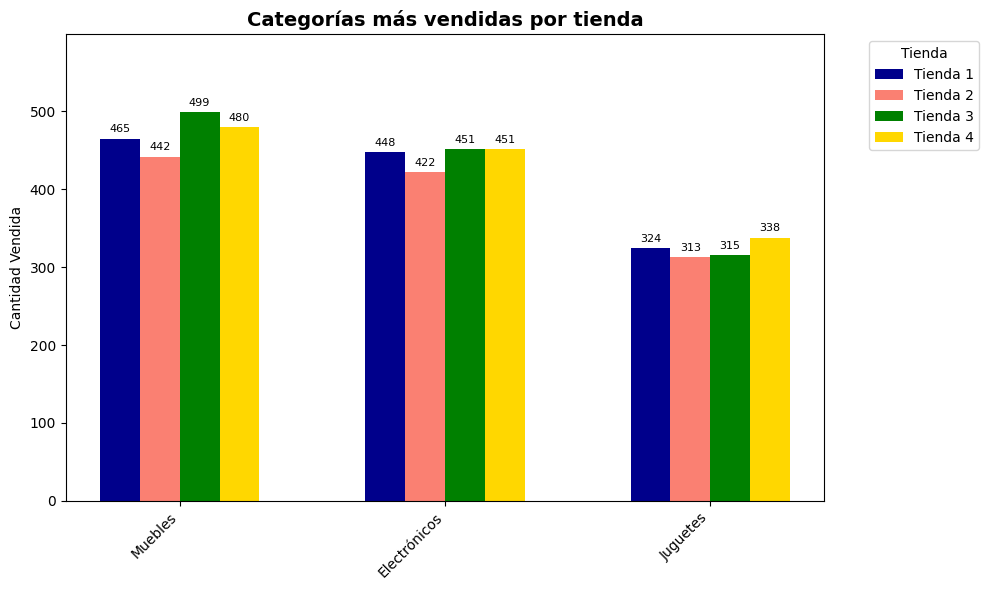

In [ ]:
#Gráfico para más ventas por categoria en todas las tiendas
import matplotlib.pyplot as plt
import numpy as np

# Extraemos las categorías únicas en el orden que aparecen
categorias = cat_mas_ventas['Categoría del Producto'].unique()
x = np.arange(len(categorias))  # posiciones base para cada categoría

colores = ['darkblue', 'salmon', 'green', 'gold']

width = 0.15  # ancho de cada barra

fig, ax = plt.subplots(figsize=(10, 6))

# Dibujar una barra por tienda usando la lista 'nombres'
for i, cat_tienda in enumerate(nombres):
    offset = width * i
    # Filtrar datos por tienda
    datos_tienda = cat_mas_ventas[cat_mas_ventas['Tienda'] == cat_tienda]
    # Alinear cantidades con el orden de categorías
    cantidades = [datos_tienda[datos_tienda['Categoría del Producto'] == cat]['Cantidad Vendida'].sum() for cat in categorias]
    rects = ax.bar(x + offset, cantidades, width, label=cat_tienda, color=colores[i])

# Añadir etiquetas
    ax.bar_label(rects, padding=3, fontsize=8)



# Etiquetas y formato
ax.set_ylabel('Cantidad Vendida')
ax.set_title('Categorías más vendidas por tienda', fontsize=14, fontweight='bold')
ax.set_xticks(x + width * (len(nombres) - 1) / 2)
ax.set_xticklabels(categorias, rotation=45, ha='right')
ax.legend(title='Tienda', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_ylim(0, cat_mas_ventas['Cantidad Vendida'].max() * 1.2)

plt.tight_layout()
plt.show()


# 3. Calificación promedio de la tienda


Calcular las calificaciones promedio de los clientes para cada tienda. El objetivo es conocer la satisfacción del cliente con los productos vendidos.

In [ ]:
calf_prom_t1 = tienda['Calificación'].mean()
calf_prom_t2 = tienda2['Calificación'].mean()
calf_prom_t3 = tienda3['Calificación'].mean()
calf_prom_t4 = tienda4['Calificación'].mean()

print(f'La calificación promedio de la tienda 1 es de: {calf_prom_t1:.2f}')
print(f'La calificación promedio de la tienda 2 es de: {calf_prom_t2:.2f}')
print(f'La calificación promedio de la tienda 3 es de: {calf_prom_t3:.2f}')
print(f'La calificación promedio de la tienda 4 es de: {calf_prom_t4:.2f}')


La calificación promedio de la tienda 1 es de: 3.98
La calificación promedio de la tienda 2 es de: 4.04
La calificación promedio de la tienda 3 es de: 4.05
La calificación promedio de la tienda 4 es de: 4.00


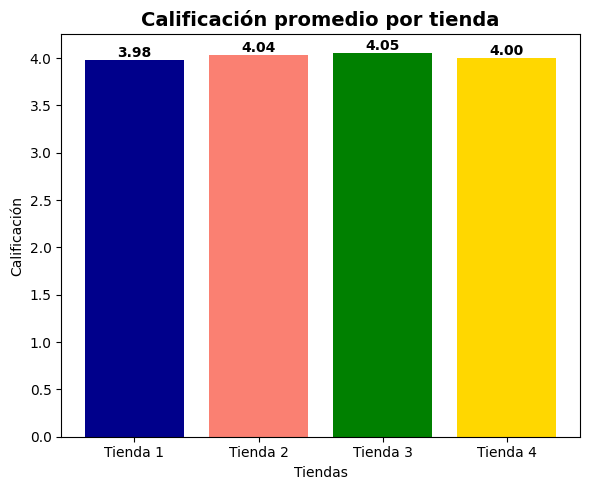

In [ ]:
#Gráfico de calificaciones promedio de las tiendas
import matplotlib.pyplot as plt

calificaciones_promedio = [calf_prom_t1, calf_prom_t2, calf_prom_t3, calf_prom_t4]

# Asignar color por tienda

colores = ['darkblue', 'salmon', 'green', 'gold']

# Estilo del gráfico
fig, ax = plt.subplots(figsize=(6,5))

# Crear barras
barras_cali = ax.bar(nombres, calificaciones_promedio, color=colores)

# Etiquetas sobre cada barra
for barrac, calprom in zip(barras_cali, calificaciones_promedio):
    ax.text(barrac.get_x() + barrac.get_width() / 2,
            barrac.get_height(),
            f"{calprom:,.2f}",
            ha='center', va='bottom', fontsize=10, fontweight='bold')

# Colocar la leyenda fuera del gráfico a la derecha
#plt.legend(title="", bbox_to_anchor=(1.05, 1), loc='upper left')

# Título y etiquetas
ax.set_title('Calificación promedio por tienda', fontsize=14, fontweight='bold')
ax.set_ylabel('Calificación')
ax.set_xlabel('Tiendas')

plt.tight_layout()

plt.show()


# 4. Productos más y menos vendidos

Identificar qué productos fueron los más vendidos y los menos vendidos en cada tienda. Visualiza los resultados para que quede claro qué productos destacaron en ventas en cada tienda.

In [ ]:
prod_vendido_t1 = tienda['Producto'].value_counts().reset_index()
prod_vendido_t1['Tienda'] = 'Tienda 1'
prod_vendido_t1.columns = ['Producto', 'Cantidad Vendida', 'Tienda']

mas_vend_t1 = prod_vendido_t1.sort_values(by ='Cantidad Vendida',ascending=False).head(3)
men_vend_t1 = prod_vendido_t1.sort_values(by ='Cantidad Vendida',ascending=False).tail(3)
resul_mas_men_vendido_t1 = pd.concat([mas_vend_t1, men_vend_t1])
resul_mas_men_vendido_t1

,Producto,Cantidad Vendida,Tienda
0,Microondas,60,Tienda 1
1,TV LED UHD 4K,60,Tienda 1
2,Armario,60,Tienda 1
48,Olla de presión,35,Tienda 1
49,Auriculares con micrófono,33,Tienda 1
50,Celular ABXY,33,Tienda 1


In [ ]:
prod_vendido_t2 = tienda2['Producto'].value_counts().reset_index()
prod_vendido_t2['Tienda'] = 'Tienda 2'
prod_vendido_t2.columns = ['Producto', 'Cantidad Vendida', 'Tienda']

mas_vend_t2 = prod_vendido_t2.sort_values(by ='Cantidad Vendida',ascending=False).head(3)
men_vend_t2 = prod_vendido_t2.sort_values(by ='Cantidad Vendida',ascending=False).tail(3)
resul_mas_men_vendido_t2 = pd.concat([mas_vend_t2, men_vend_t2])
resul_mas_men_vendido_t2

,Producto,Cantidad Vendida,Tienda
0,Iniciando en programación,65,Tienda 2
1,Microondas,62,Tienda 2
2,Batería,61,Tienda 2
48,Mesa de comedor,34,Tienda 2
49,Impresora,34,Tienda 2
50,Juego de mesa,32,Tienda 2


In [ ]:
prod_vendido_t3 = tienda3['Producto'].value_counts().reset_index()
prod_vendido_t3['Tienda'] = 'Tienda 3'
prod_vendido_t3.columns = ['Producto', 'Cantidad Vendida', 'Tienda']

mas_vend_t3 = prod_vendido_t3.sort_values(by ='Cantidad Vendida',ascending=False).head(3)
men_vend_t3 = prod_vendido_t3.sort_values(by ='Cantidad Vendida',ascending=False).tail(3)
resul_mas_men_vendido_t3 = pd.concat([mas_vend_t3, men_vend_t3])
resul_mas_men_vendido_t3

,Producto,Cantidad Vendida,Tienda
0,Kit de bancas,57,Tienda 3
1,Mesa de comedor,56,Tienda 3
2,Cama king,56,Tienda 3
48,Mochila,36,Tienda 3
49,Microondas,36,Tienda 3
50,Bloques de construcción,35,Tienda 3


In [ ]:
prod_vendido_t4 = tienda4['Producto'].value_counts().reset_index()
prod_vendido_t4['Tienda'] = 'Tienda 4'
prod_vendido_t4.columns = ['Producto', 'Cantidad Vendida', 'Tienda']

mas_vend_t4 = prod_vendido_t4.sort_values(by ='Cantidad Vendida',ascending=False).head(3)
men_vend_t4 = prod_vendido_t4.sort_values(by ='Cantidad Vendida',ascending=False).tail(3)
resul_mas_men_vendido_t4 = pd.concat([mas_vend_t4, men_vend_t4])
resul_mas_men_vendido_t4

,Producto,Cantidad Vendida,Tienda
0,Cama box,62,Tienda 4
1,Cubertería,59,Tienda 4
2,Dashboards con Power BI,56,Tienda 4
48,Guitarra acústica,37,Tienda 4
49,Armario,34,Tienda 4
50,Guitarra eléctrica,33,Tienda 4


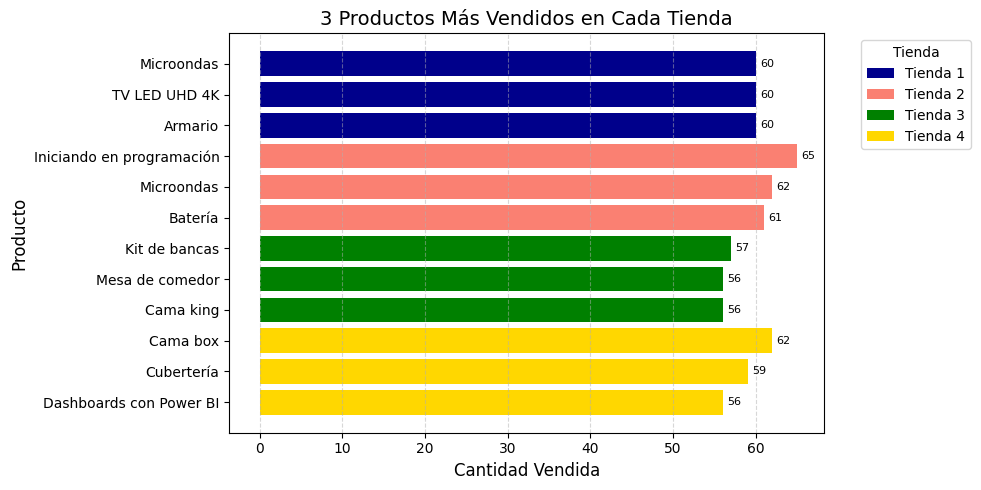

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

resul_mas_vendido_tiendas = pd.concat([mas_vend_t1, mas_vend_t2, mas_vend_t3, mas_vend_t4])

# Crear etiquetas combinadas: Producto (Tienda X)
resul_mas_vendido_tiendas['Etiqueta'] = resul_mas_vendido_tiendas['Producto']

# Asignar color según tienda usando lista
nombres = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
colores = ['darkblue', 'salmon', 'green', 'gold']
color_map = dict(zip(nombres, colores))
resul_mas_vendido_tiendas['Color'] = resul_mas_vendido_tiendas['Tienda'].map(color_map)

# Crear figura
fig, ax = plt.subplots(figsize=(10, 5))

# Reiniciar índice para usarlo como eje Y
resul_mas_vendido_tiendas = resul_mas_vendido_tiendas.reset_index(drop=True)

# Graficar barras horizontales usando índice
rects = ax.barh(
    resul_mas_vendido_tiendas.index,
    resul_mas_vendido_tiendas['Cantidad Vendida'],
    color=resul_mas_vendido_tiendas['Color']
)

# Etiquetas en eje Y: solo nombre del producto
ax.set_yticks(resul_mas_vendido_tiendas.index)
ax.set_yticklabels(resul_mas_vendido_tiendas['Producto'])

# Añadir etiquetas sobre las barras
ax.bar_label(rects, padding=3, fontsize=8)

# Títulos y etiquetas
ax.set_title('3 Productos Más Vendidos en Cada Tienda', fontsize=14)
ax.set_xlabel('Cantidad Vendida', fontsize=12)
ax.set_ylabel('Producto', fontsize=12)
ax.invert_yaxis()
ax.grid(axis='x', linestyle='--', alpha=0.5)



# Crear la leyenda con colores y nombres de tienda
for i, nombre in enumerate(nombres):
    ax.bar(0, 0, color=colores[i], label=nombre)  # barras invisibles para generar leyenda

# Insertar leyenda como en el gráfico de ejemplo
ax.legend(title='Tienda', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

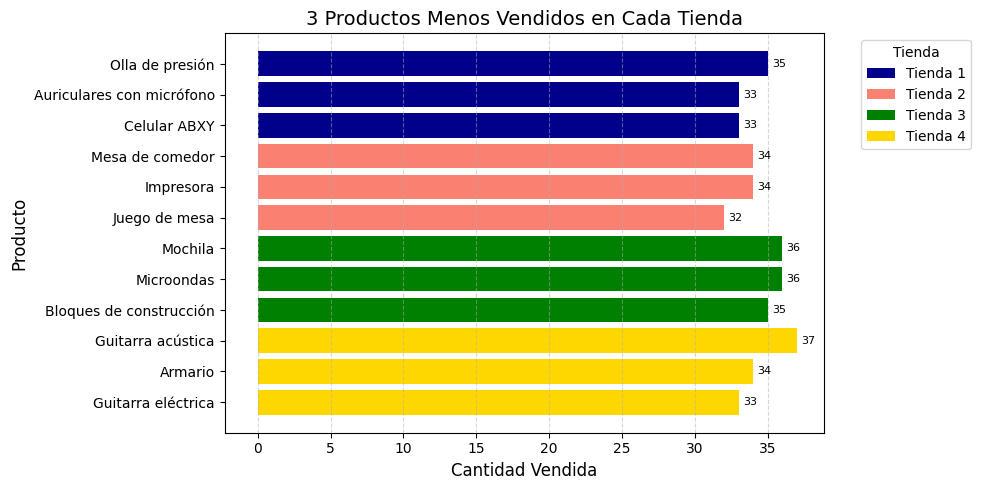

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

resul_men_vendido_tiendas = pd.concat([men_vend_t1, men_vend_t2, men_vend_t3, men_vend_t4])

# Crear etiquetas combinadas: Producto (Tienda X)
resul_men_vendido_tiendas['Etiqueta'] = resul_men_vendido_tiendas['Producto']


# Asignar color según tienda usando lista
nombres = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
colores = ['darkblue', 'salmon', 'green', 'gold']
color_map = dict(zip(nombres, colores))
resul_men_vendido_tiendas['Color'] = resul_men_vendido_tiendas['Tienda'].map(color_map)

# Crear figura
fig, ax = plt.subplots(figsize=(10, 5))

# Reiniciar índice para usarlo como eje Y
resul_men_vendido_tiendas = resul_men_vendido_tiendas.reset_index(drop=True)

# Graficar barras horizontales usando índice
rects = ax.barh(
    resul_men_vendido_tiendas.index,
    resul_men_vendido_tiendas['Cantidad Vendida'],
    color=resul_men_vendido_tiendas['Color']
)

# Etiquetas en eje Y: solo nombre del producto
ax.set_yticks(resul_men_vendido_tiendas.index)
ax.set_yticklabels(resul_men_vendido_tiendas['Producto'])

# Añadir etiquetas sobre las barras
ax.bar_label(rects, padding=3, fontsize=8)

# Títulos y etiquetas
ax.set_title('3 Productos Menos Vendidos en Cada Tienda', fontsize=14)
ax.set_xlabel('Cantidad Vendida', fontsize=12)
ax.set_ylabel('Producto', fontsize=12)
ax.invert_yaxis()
ax.grid(axis='x', linestyle='--', alpha=0.5)



# Crear la leyenda con colores y nombres de tienda
for i, nombre in enumerate(nombres):
    ax.bar(0, 0, color=colores[i], label=nombre)  # barras invisibles para generar leyenda

# Insertar leyenda como en el gráfico de ejemplo
ax.legend(title='Tienda', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

# 5. Envío promedio por tienda

Calcular el costo de envío promedio para cada tienda. El objetivo es comprender cuánto se gasta, en promedio, en el envío de cada tienda.  Sabiendo que el cliente paga el envío.

In [ ]:
cost_env_t1 = round(tienda['Costo de envío'].mean())
cost_env_t2 = round(tienda2['Costo de envío'].mean())
cost_env_t3 = round(tienda3['Costo de envío'].mean())
cost_env_t4 = round(tienda4['Costo de envío'].mean())

print(f'El costo de envío promedio de la tienda 1 es de: $ {cost_env_t1:,.2f}')
print(f'El costo de envío promedio de la tienda 2 es de: $ {cost_env_t2:,.2f}')
print(f'El costo de envío promedio de la tienda 3 es de: $ {cost_env_t3:,.2f}')
print(f'El costo de envío promedio de la tienda 4 es de: $ {cost_env_t4:,.2f}')

El costo de envío promedio de la tienda 1 es de: $ 26,019.00
El costo de envío promedio de la tienda 2 es de: $ 25,216.00
El costo de envío promedio de la tienda 3 es de: $ 24,806.00
El costo de envío promedio de la tienda 4 es de: $ 23,459.00


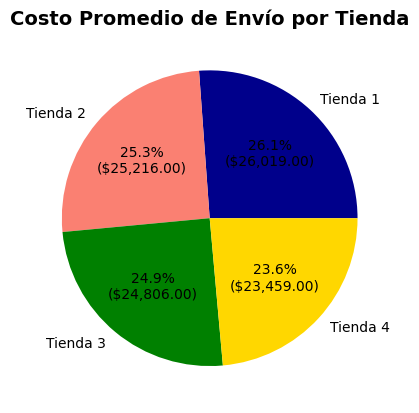

In [ ]:
import matplotlib.pyplot as plt

costo_promedio = [cost_env_t1, cost_env_t2, cost_env_t3, cost_env_t4]

nombres = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
colores = ['darkblue', 'salmon', 'green', 'gold']
ax.set_aspect("equal")

def formato(val):
    total = sum(costo_promedio)
    valor = total * val / 100
    return f"{val:.1f}%\n(${valor:,.2f})"

plt.pie(costo_promedio, labels=nombres, autopct=formato, colors=colores)


plt.title("Costo Promedio de Envío por Tienda", fontsize=14, fontweight='bold')


plt.show()

## **EXTRA**

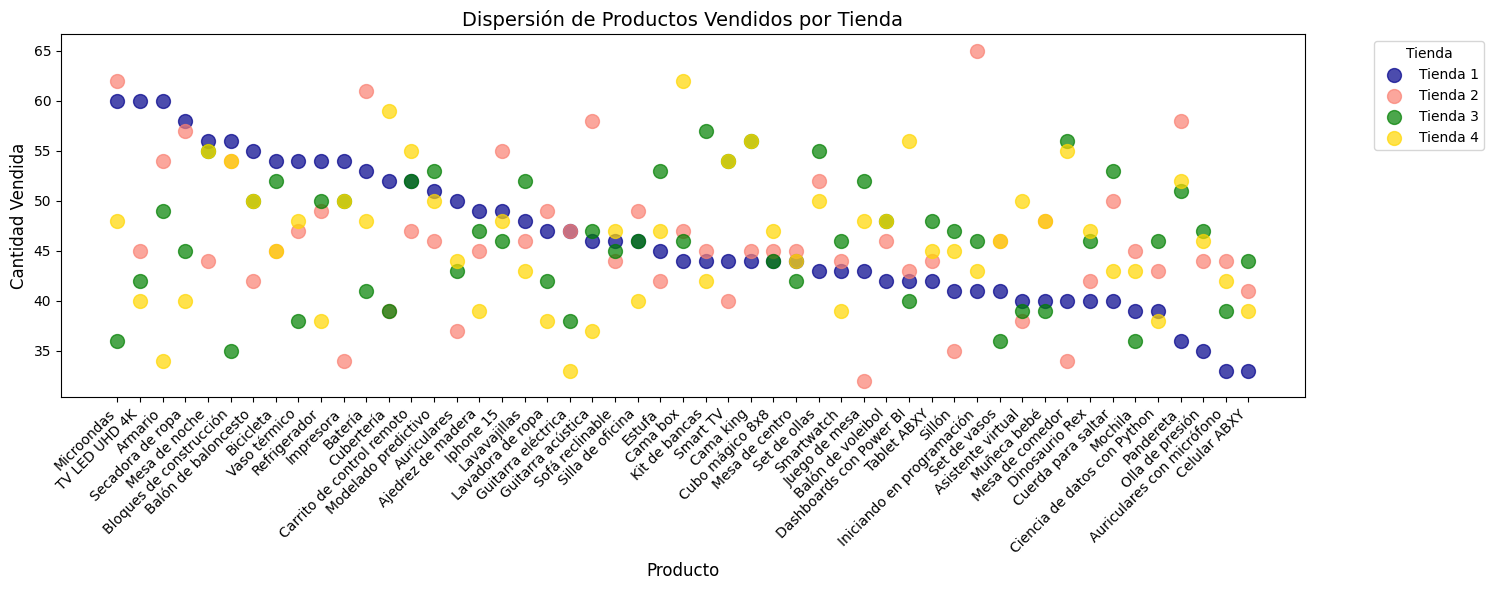

In [ ]:
#grafico de dispercion
import matplotlib.pyplot as plt


df_tiendas = pd.concat([prod_vendido_t1, prod_vendido_t2, prod_vendido_t3, prod_vendido_t4], ignore_index=True)

# Asignar colores por tienda
nombres = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
colores = ['darkblue', 'salmon', 'green', 'gold']
color_map = dict(zip(nombres, colores))
df_tiendas['Color'] = df_tiendas['Tienda'].map(color_map)

# Crear figura
fig, ax = plt.subplots(figsize=(15,6))

# Graficar cada tienda como grupo
for tienda_n in nombres:
    datos = df_tiendas[df_tiendas['Tienda'] == tienda_n]
    ax.scatter(
        datos['Producto'],
        datos['Cantidad Vendida'],
        color=color_map[tienda_n],
        label=tienda_n,
        s=100,  # tamaño del punto
        alpha=0.7
    )

# Etiquetas y formato
ax.set_title('Dispersión de Productos Vendidos por Tienda', fontsize=14)
ax.set_xlabel('Producto', fontsize=12)
ax.set_ylabel('Cantidad Vendida', fontsize=12)
ax.legend(title='Tienda', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
#Mapa geográfico
import plotly.express as px


df_geo = pd.concat([tienda,tienda2,tienda3,tienda4], ignore_index=True)

fig = px.scatter_mapbox(
    df_geo,
    lat='Latitud',
    lon='Longitud',
    size='Cantidad Vendida',
    color='Tienda',
    hover_name='Tienda',
    zoom=5,
    mapbox_style='carto-positron'
)

fig.update_layout(title='Mapa Geográfico de Ventas por Tienda')
fig.show()

ValueError: Value of 'size' is not the name of a column in 'data_frame'. Expected one of ['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío', 'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación', 'Método de pago', 'Cantidad de cuotas', 'lat', 'lon'] but received: Cantidad Vendida